In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #  忽略弹出的warnings信息
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
(data['TotalCharges'] == ' ').sum()

11

In [4]:
drop_index = data.loc[data['TotalCharges'] == ' '].index
data.drop(labels=drop_index,axis=0,inplace=True)
data['TotalCharges'] = data['TotalCharges'].astype(dtype='float')

Text(0.5, 1.0, 'MonthlyCharges')

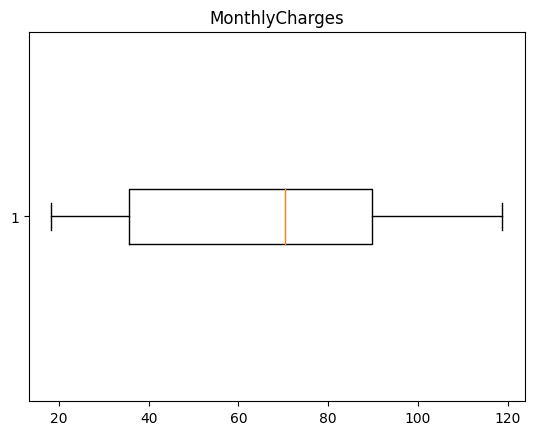

In [7]:
a = plt.boxplot(data['MonthlyCharges'],vert=False)
plt.title('MonthlyCharges')

Text(0.5, 1.0, 'TotalCharges')

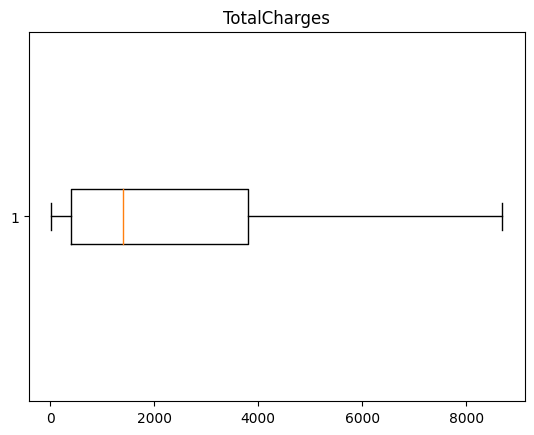

In [8]:
a = plt.boxplot(data['TotalCharges'],vert=False)
plt.title('TotalCharges')


In [9]:
data.loc[data['MultipleLines']=='No phone service', 'MultipleLines'] = 'No'
internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in internetCols:
    data.loc[data[i]=='No internet service', i] = 'No'
 

In [10]:

cols_name = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling']
for col in cols_name:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [11]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [12]:
data['gender'] = data['gender'].map({'Female': 1, 'Male': 0}).fillna(-1)

In [13]:

cols_name = ['InternetService', 'Contract', 'PaymentMethod']
for col in cols_name:
    oneHot_df = pd.get_dummies(data[col],prefix=col) 
    data = pd.concat(objs=[data,oneHot_df],axis=1)

In [14]:

data.drop(labels=cols_name,axis=1,inplace=True)

In [15]:
data.drop(labels='customerID',axis=1,inplace=True)

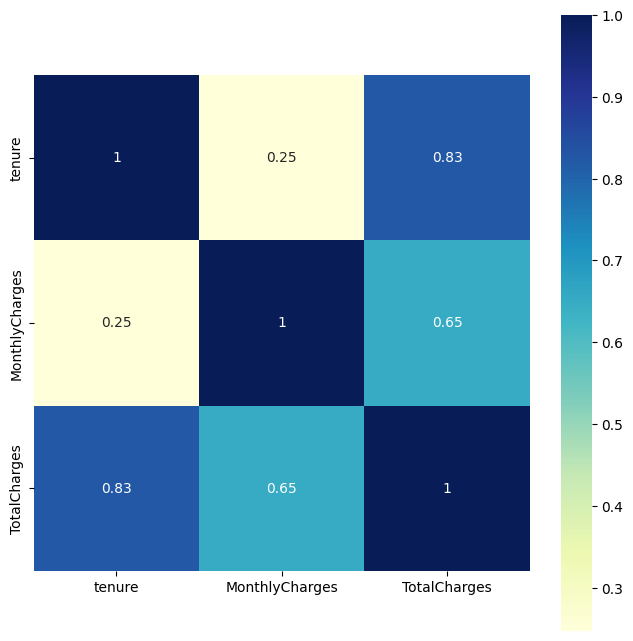

In [16]:
import seaborn as sns
nu_fea = data[['tenure', 'MonthlyCharges', 'TotalCharges']]    # 选择连续型数值特征计算相关系数
nu_fea = list(nu_fea)    # 特征名列表
pearson_mat = data[nu_fea].corr()  
plt.figure(figsize=(8,8)) # 建立图像
sns.heatmap(pearson_mat, square=True, annot=True, cmap="YlGnBu")    # 用热度图表示相关系数矩阵
plt.show() # 展示热度图

In [17]:

data.drop(labels='TotalCharges',axis=1,inplace=True)

In [18]:

data.drop(labels=['Partner','StreamingMovies','OnlineSecurity','TechSupport','StreamingTV','OnlineBackup','DeviceProtection','MultipleLines'],axis=1,inplace=True)

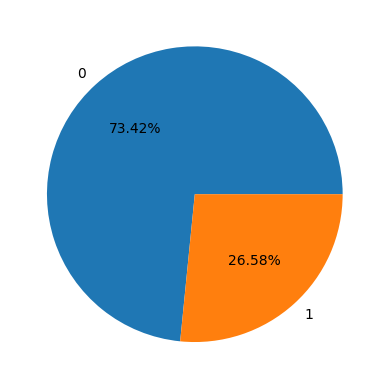

In [19]:

from matplotlib import pyplot as plt
p = data['Churn'].value_counts()
a = plt.pie(p,autopct='%.2f%%',labels=p.index)

In [21]:
# Separate labels from data     
x_cols = [col for col in data.columns if col != 'Churn']
X = data[x_cols]
y = data['Churn']


In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0, sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(X, y)

Class 0: 5163
Class 1: 5163
Proportion: 1.0 : 1


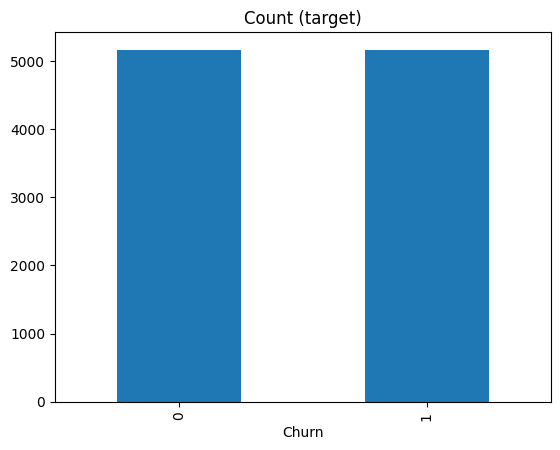

In [24]:
target_count = y_sm.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [25]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
from sklearn.linear_model import LogisticRegression    # 逻辑回归
from sklearn.svm import SVC                                          # SVM
from sklearn.ensemble import RandomForestClassifier    # 随机森林
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from mlxtend.classifier import StackingCVClassifier
import xgboost as xgb
import itertools
#from xgboost import XGBRegressor as XGBR                     #XGBoost
#from lightgbm import LGBMClassifier                                   #LGB
from sklearn.metrics import recall_score, f1_score    
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score


In [27]:
#to print confusion matrix
from sklearn.metrics import confusion_matrix
#to print metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

## Logistic Regression

In [1]:
#INSTANTIATE LOGISTIC REGRESSION
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
lr_acc_score=metrics.accuracy_score(y_test, y_pred_log)
lr_f1_score=metrics.f1_score(y_test, y_pred_log)
lr_conf_matrix = confusion_matrix(y_test, y_pred_log)
# checking accuracy
print('Test Accuracy score: ', lr_acc_score)
print('Test F1 score: ', lr_f1_score)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_log))

## KNN

In [2]:
#INSTANTIATE KNN MODEL
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
# make class predictions for the testing set
y_pred_knn = knn.predict(x_test)
knn_acc_score=metrics.accuracy_score(y_test, y_pred_knn)
knn_f1_score=metrics.f1_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
# checking accuracy
print('Test Accuracy score: ', knn_acc_score)
print('Test F1 score: ',knn_f1_score )
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_knn))

## Random Forest

In [3]:
#INSTANTIATE RANDOM FOREST MODEL
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_forest = rfc.predict(x_test)
rfc_acc_score=metrics.accuracy_score(y_test, y_pred_forest)
rfc_f1_score = metrics.f1_score(y_test, y_pred_forest)
rfc_conf_matrix=confusion_matrix(y_test,y_pred_forest)
# checking accuracy
print('Test Accuracy score: ', rfc_acc_score)
print('Test F1 score: ', rfc_f1_score)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_forest))

## Naive Bayes

In [4]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test,y_pred_nb)
nb_acc_score = metrics.accuracy_score(y_test, y_pred_nb)
nb_f1_score=metrics.f1_score(y_test, y_pred_nb)
print('Test Accuracy score: ',nb_acc_score)
print('Test F1 score: ', nb_f1_score)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_nb))

## Support Vector Classifier

In [5]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
svc_acc_score = metrics.accuracy_score(y_test, y_pred_svc)
svc_f1_score = metrics.f1_score(y_test, y_pred_svc)
print('Test Accuracy score: ',svc_acc_score)
print('Test F1 score: ', svc_f1_score)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score,'\n')
print(classification_report(y_test,y_pred_svc))

### XTree

In [6]:
xtree=ExtraTreesClassifier()
xtree.fit(x_train, y_train)
y_pred_xtree = xtree.predict(x_test)
xtree_conf_matrix = confusion_matrix(y_test, y_pred_xtree)
xtree_acc_score = metrics.accuracy_score(y_test, y_pred_xtree)
xtree_f1_score = metrics.f1_score(y_test, y_pred_xtree)
print('Test Accuracy score: ',xtree_acc_score)
print('Test F1 score: ', xtree_f1_score)
print("confusion matrix")
print(xtree_conf_matrix)
print("\n")
print("Accuracy of XTree Classifier:",xtree_acc_score,'\n')
print(classification_report(y_test,y_pred_xtree))